In [32]:
# Importing Necessary Libraries and Functions

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

from matplotlib.colors import ListedColormap

from scipy import stats
from scipy.stats import norm, skew

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.preprocessing import StandardScaler

In [2]:
wine = pd.read_csv("/Users/godskid/Desktop/datasets/wine_quality.csv")

In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [5]:
# Cleaning Column Names
wine.rename(columns=str.lower, inplace=True)
wine.rename(columns={col: col.replace(" ", "_") for col in wine.columns}, inplace=True)

In [6]:
# Display Data After Cleaning
display(wine)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [7]:
# Check For Null Values
wine.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
ph                      0
sulphates               0
alcohol                 0
quality                 0
id                      0
dtype: int64

In [8]:
# Statistical analysis
wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


# Exploratory data analysis

<AxesSubplot:xlabel='quality', ylabel='count'>

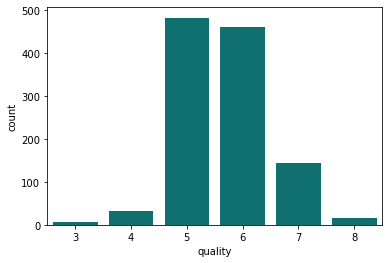

In [9]:
sns.countplot(data=wine,x='quality',color='teal')

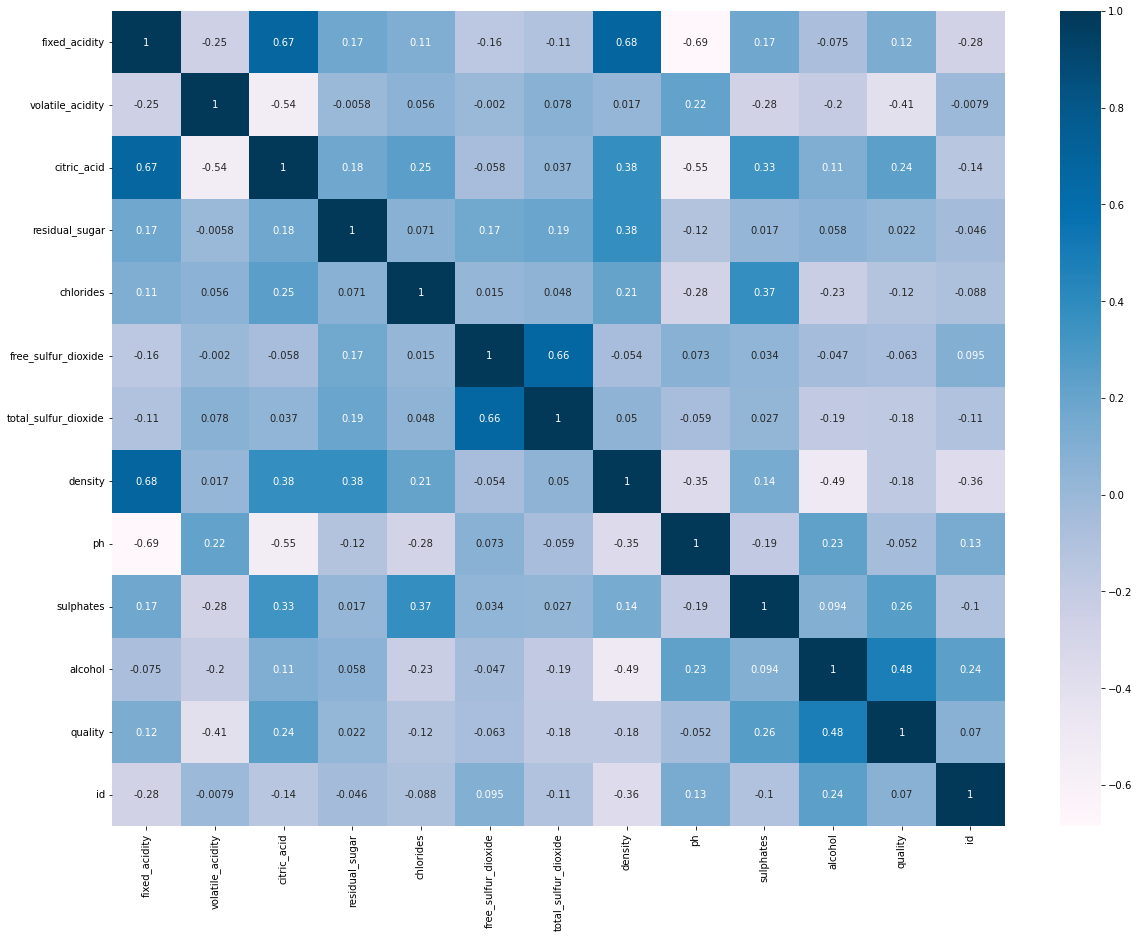

In [10]:
# Heatmap
plt.figure(figsize=(20,15))
sns.heatmap(wine.corr(), annot=True, cmap=plt.cm.PuBu)
plt.show()

Alcohol, Citric acid and Sulphate levels contributes more to the quality of the Wine

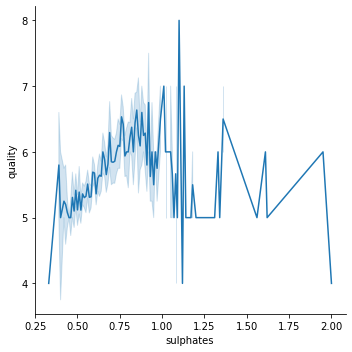

In [11]:
sns.relplot(data=wine,x="sulphates",y="quality",kind="line")

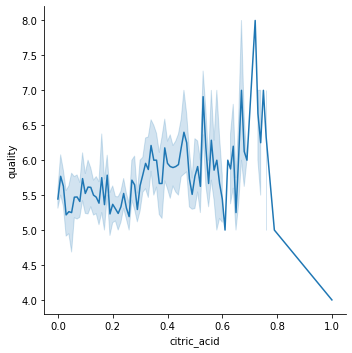

In [12]:
sns.relplot(data=wine,x="citric_acid",y="quality",kind="line")

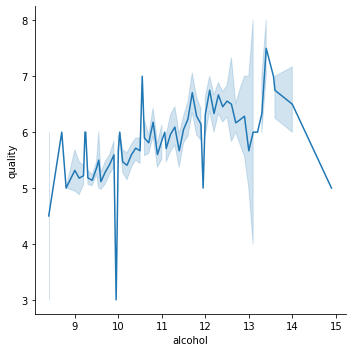

In [13]:
sns.relplot(data=wine,x="alcohol",y="quality",kind="line")

In [14]:
# Setting Target

X = wine.drop(columns=['quality','id'])
yy = wine.quality

In [16]:
y = wine['quality'].apply(lambda yy: 1 if yy>=6 else 0)

In [18]:
# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
print('\nTrain Shape\n')
print('X train shape: ', X_train.shape)
print('Y train shape: ', y_train.shape)
print('\n\nTest Shape\n')
print('X test shape: ', X_test.shape)
print('Y test shape: ', y_test.shape)


Train Shape

X train shape:  (914, 11)
Y train shape:  (914,)


Test Shape

X test shape:  (229, 11)
Y test shape:  (229,)


In [19]:
# Logistic Regression

logreg = LogisticRegression(C=24)

logreg.fit(X_train, y_train)

y_predict1 = logreg.predict(X_test)

/Users/godskid/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


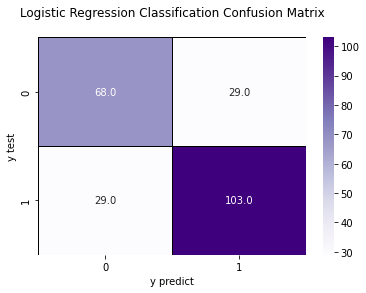

In [20]:
# Confusion Matrix

logreg_cm = confusion_matrix(y_test, y_predict1)
sns.heatmap(logreg_cm, annot=True, linewidth=0.7, linecolor='black', fmt='.1f', cmap="Purples")
plt.title('Logistic Regression Classification Confusion Matrix\n')
plt.xlabel('y predict')
plt.ylabel('y test')
plt.show()

In [21]:
# Test Score
score_logreg = logreg.score(X_test, y_test)
print('Logistic Regression Score = ',score_logreg)

Logistic Regression Score =  0.7467248908296943


In [22]:
# Classification Report
print('\nClassification Report for Logistic Regression\n')
print(classification_report(y_test, y_predict1))


Classification Report for Logistic Regression

              precision    recall  f1-score   support

           0       0.70      0.70      0.70        97
           1       0.78      0.78      0.78       132

    accuracy                           0.75       229
   macro avg       0.74      0.74      0.74       229
weighted avg       0.75      0.75      0.75       229



In [23]:
# Gaussian Naive Bayes

nbcla = GaussianNB()

nbcla.fit(X_train, y_train)

y_predict2 = nbcla.predict(X_test)

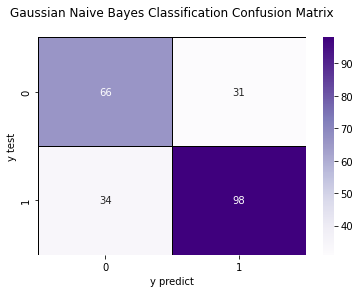

In [24]:
# Confusion Matrix
nbcla_cm = confusion_matrix(y_test, y_predict2)
sns.heatmap(nbcla_cm, annot=True, linewidth=0.7, linecolor='black', fmt='g', cmap="Purples")
plt.title('Gaussian Naive Bayes Classification Confusion Matrix\n')
plt.xlabel('y predict')
plt.ylabel('y test')
plt.show()

In [25]:
# Test Score
score_nbcla = nbcla.score(X_test, y_test)
print('Gaussian Naive Bayes Score = ',score_nbcla)

Gaussian Naive Bayes Score =  0.7161572052401747


In [26]:
# Classification Report
print('\nClassification Report for Gaussian Naive Bayes\n')
print(classification_report(y_test, y_predict2))


Classification Report for Gaussian Naive Bayes

              precision    recall  f1-score   support

           0       0.66      0.68      0.67        97
           1       0.76      0.74      0.75       132

    accuracy                           0.72       229
   macro avg       0.71      0.71      0.71       229
weighted avg       0.72      0.72      0.72       229



In [27]:
# Decision Tree

dtcla = DecisionTreeClassifier(random_state=9)

dtcla.fit(X_train, y_train)

y_predict3 = dtcla.predict(X_test)

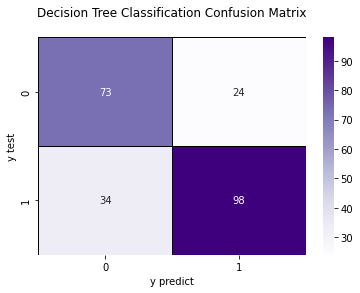

In [28]:
# Confusion Matrix

dtcla_cm = confusion_matrix(y_test, y_predict3)
sns.heatmap(dtcla_cm, annot=True, linewidth=0.7, linecolor='black', fmt='g', cmap="Purples")
plt.title('Decision Tree Classification Confusion Matrix\n')
plt.xlabel('y predict')
plt.ylabel('y test')
plt.show()

In [29]:
# Test Score
score_dtcla = dtcla.score(X_test, y_test)
print('Decision Tree Score = ', score_dtcla)

Decision Tree Score =  0.7467248908296943


In [30]:
# Classification Report
print('\n\t\t\tClassification Tree for Decision Tree\n')
print(classification_report(y_test, y_predict3))


			Classification Tree for Decision Tree

              precision    recall  f1-score   support

           0       0.68      0.75      0.72        97
           1       0.80      0.74      0.77       132

    accuracy                           0.75       229
   macro avg       0.74      0.75      0.74       229
weighted avg       0.75      0.75      0.75       229



In [33]:
#SVM

svm = SVC()

svm.fit(X_train,y_train)

y_predict4 = svm.predict(X_test)

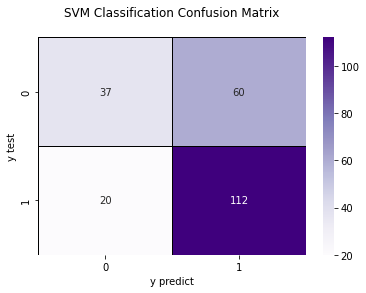

In [34]:
# Confusion Matrix

svm_cm = confusion_matrix(y_test, y_predict4)
sns.heatmap(svm_cm, annot=True, linewidth=0.7, linecolor='black', fmt='g', cmap="Purples")
plt.title('SVM Classification Confusion Matrix\n')
plt.xlabel('y predict')
plt.ylabel('y test')
plt.show()

In [35]:
# Test Score
score_svm = svm.score(X_test, y_test)
print('SVM Score = ', score_svm)

SVM Score =  0.6506550218340611


In [36]:
# Classification Report
print('\n\t\t\tClassification Tree for SVM\n')
print(classification_report(y_test, y_predict4))


			Classification Tree for SVM

              precision    recall  f1-score   support

           0       0.65      0.38      0.48        97
           1       0.65      0.85      0.74       132

    accuracy                           0.65       229
   macro avg       0.65      0.61      0.61       229
weighted avg       0.65      0.65      0.63       229



In [37]:
# All Test Scores
Testscores = pd.Series([score_logreg, score_nbcla, score_dtcla, score_svm], 
                        index=['Logistic Regression Score = ', 'Naive Bayes Score = ', 
                               'Decision Tree Score = ','Support Vector Machine = ']) 
print(Testscores)

Logistic Regression Score =     0.746725
Naive Bayes Score =             0.716157
Decision Tree Score =           0.746725
Support Vector Machine =        0.650655
dtype: float64


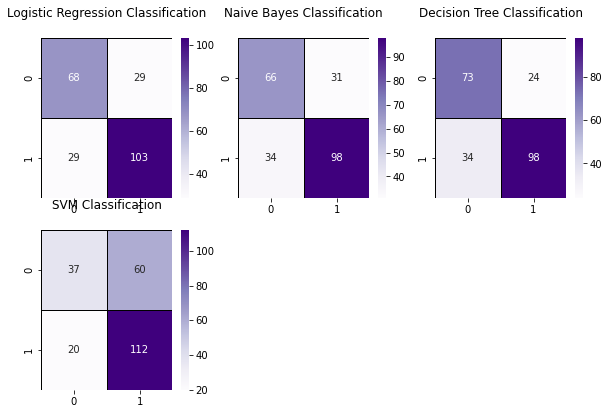

In [45]:
# All Confusion Matrices
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(3, 3, 1) 
ax1.set_title('Logistic Regression Classification\n') 
ax2 = fig.add_subplot(3, 3, 2)
ax2.set_title('Naive Bayes Classification\n')
ax3 = fig.add_subplot(3, 3, 3)
ax3.set_title('Decision Tree Classification\n')
ax4 = fig.add_subplot(3, 3, 4)
ax4.set_title('SVM Classification\n')

sns.heatmap(data=logreg_cm, annot=True, linewidth=0.7, linecolor='black',cmap="Purples" ,fmt='g', ax=ax1)
sns.heatmap(data=nbcla_cm, annot=True, linewidth=0.7, linecolor='black',cmap="Purples" ,fmt='g', ax=ax2)
sns.heatmap(data=dtcla_cm, annot=True, linewidth=0.7, linecolor='black',cmap="Purples" ,fmt='g', ax=ax3)
sns.heatmap(data=svm_cm, annot=True, linewidth=0.7, linecolor='black',cmap="Purples" ,fmt='g', ax=ax4)

plt.show()

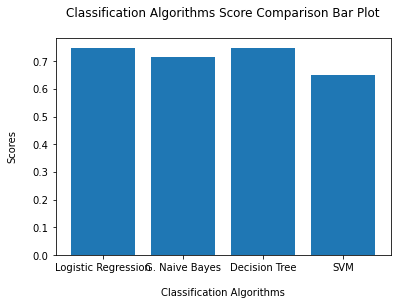

In [46]:
# Comparison of Algorithms

x=['Logistic Regression', 'G. Naive Bayes', 'Decision Tree', 'SVM']
y = [score_logreg, score_nbcla, score_dtcla, score_svm]

plt.bar(x,y)
plt.xlabel('\nClassification Algorithms')
plt.ylabel("Scores\n")
plt.title('Classification Algorithms Score Comparison Bar Plot\n')
plt.show()

# Predict wine quality for new data

In [47]:
wine.sample(10)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,id
483,8.5,0.460,0.31,2.25,0.078,32.0,58.0,0.99800,3.33,0.54,9.8,5,682
671,8.3,0.280,0.48,2.10,0.093,6.0,12.0,0.99408,3.26,0.62,12.4,7,951
715,7.0,0.500,0.14,1.80,0.078,10.0,23.0,0.99636,3.53,0.61,10.4,5,1019
496,11.8,0.380,0.55,2.10,0.071,5.0,19.0,0.99860,3.11,0.62,10.8,6,699
36,6.6,0.500,0.04,2.10,0.068,6.0,14.0,0.99550,3.39,0.64,9.4,6,52
1119,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5,1567
342,10.2,0.670,0.39,1.90,0.054,6.0,17.0,0.99760,3.17,0.47,10.0,5,485
172,7.3,0.660,0.00,2.00,0.084,6.0,23.0,0.99830,3.61,0.96,9.9,6,245
1077,7.1,0.270,0.60,2.10,0.074,17.0,25.0,0.99814,3.38,0.72,10.6,6,1508
794,6.3,0.470,0.00,1.40,0.055,27.0,33.0,0.99220,3.45,0.48,12.3,6,1122


In [76]:
new_data=(8, 0.35, 0.54, 2.5, 0.0098,8.0,20.0,0.9994,3.2,0.7,12)

In [77]:
data = np.asarray(new_data)

In [78]:
data_reshaped=data.reshape(1,-1)

In [80]:
prediction = dtcla.predict(data_reshaped)

/Users/godskid/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [87]:
if(prediction[0]==1):
    print('Good Quality Wine')
else:
    print('Bad Quality Wine')

Good Quality Wine


In [82]:
new_data2=(6, 0.5, 0.2, 2, 0.006,8.0,12.0,0.9994,3.2,0.5,10)

In [83]:
data2 = np.asarray(new_data2)

In [84]:
data_reshaped2=data2.reshape(1,-1)

In [85]:
prediction2 = dtcla.predict(data_reshaped2)

/Users/godskid/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [88]:
if(prediction2[0]==1):
    print('Good Quality Wine')
else:
    print('Bad Quality Wine')

Bad Quality Wine
